# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [27]:
# !python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import scipy.linalg
import timeit
import time
import matplotlib.pyplot as plt

%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

In [28]:
def spare_matrix_Abt(m: int, n: int) -> tuple[np.ndarray, np.ndarray] | None:
    if not isinstance(m, int) or not isinstance(n, int):
        return None
    b = []
    t = np.linspace(0,1,m)
    b = np.cos(4*t)
    A = np.vander(t,n, increasing=True)
    return (A, b)

Zaimplementowana funkcja spare_matrix_Abt(m, n) ma na celu przygotowanie danych do problemu aproksymacji poprzez wygenerowanie macierzy A i wektora b. Na początku tworzony jest wektor t zawierający m równo rozłożonych punktów w przedziale [0, 1], co realizuje funkcja np.linspace. Następnie, wektor b jest obliczany jako wynik wektorowej operacji cos(4t) na tym wektorze. Macierz A jest generowana jako macierz Vandermonde'a bazująca na wektorze t. Użyto do tego funkcji np.vander z parametrem n określającym liczbę kolumn oraz increasing=True. Takie ustawienie zapewnia, że kolumny macierzy reprezentują rosnące potęgi t (od t^0 do t^(n-1)), zgodnie z definicją z zadania. Po walidacji typów wejściowych, funkcja zwraca krotkę zawierającą macierz A o wymiarach m x n oraz wektor b o długości m.

---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [29]:
def square_from_rectan(A: np.ndarray, b: np.ndarray) -> tuple[np.ndarray, np.ndarray] | None:
    if not isinstance(A, np.ndarray) or not isinstance(b, np.ndarray):
        return None
    if A.ndim != 2:
        return None
    if b.ndim != 1:
        return None
    if A.shape[0] != b.shape[0]:
        return None
    A_new = A.T @ A
    b_new = A.T @ b
    return (A_new, b_new)

m = 50
n = 12
A, b = main.spare_matrix_Abt(m, n)
time_solve = []
mem_solve = []
norm_solve = []
#Metoda 1
A_sq, b_sq = main.square_from_rectan(A,b)
saved_timing_1 = %timeit -r 5 -n 10 -o np.linalg.solve(A_sq, b_sq)
time_solve.append(saved_timing_1.average)
mem_temp_1 = %memit -o np.linalg.solve(A_sq, b_sq)
mem_solve.append(mem_temp_1)
x_1 = np.linalg.solve(A_sq, b_sq)
norm_solve.append(main.residual_norm(A, x_1, b))
#Metoda 2
saved_timing_2 = %timeit -r 5 -n 10 -o np.linalg.lstsq(A, b)[0]
time_solve.append(saved_timing_2.average)
mem_temp_2 = %memit -o np.linalg.lstsq(A, b)[0]
mem_solve.append(mem_temp_2)
x_2 = np.linalg.lstsq(A, b)[0]
norm_solve.append(main.residual_norm(A, x_2, b))
#Metoda 3
Q, R = np.linalg.qr(A)
b_q = Q.T @ b
2
saved_timing_3 = %timeit -r 5 -n 10 -o sp.linalg.solve_triangular(R, b_q)
time_solve.append(saved_timing_3.average)
mem_temp_3 = %memit -o sp.linalg.solve_triangular(R, b_q)
mem_solve.append(mem_temp_3)
x_3 = sp.linalg.solve_triangular(R, b_q)
norm_solve.append(main.residual_norm(A, x_3, b))
#Metoda 4
def solve_svd(A, b):
    U, sigma, V = np.linalg.svd(A, False) #FullMatrix na false, żeby nie wymagało macierzy kwadratowej
    sigma = np.diag(sigma)
    return V.T @ np.linalg.solve(sigma, U.T @ b)
saved_timing_4 = %timeit -r 5 -n 10 -o solve_svd(A, b)
time_solve.append(saved_timing_4.average)
mem_temp_4 = %memit -o solve_svd(A, b)
mem_solve.append(mem_temp_4)
x_4 = solve_svd(A, b)
norm_solve.append(main.residual_norm(A, x_3, b))
print("-==---==--=-=-=-=-=-=-=-=-=-==--=-=")
for i in range(4):
    print("Dla metody nr {0}".format(i+1))
    print("- Czas wykonywania wynosi: {0} s,\n- zuzycie pamieci wynioslo: {1},\n- a norma residuum wyniosla: {2}.".format(time_solve[i], mem_solve[i], norm_solve[i]))
    print("-==---==--=-=-=-=-=-=-=-=-=-==--=-=")

9.64 μs ± 3.28 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 192.69 MiB, increment: 0.00 MiB
39.5 μs ± 6.29 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 192.69 MiB, increment: 0.00 MiB
16.5 μs ± 4.21 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 192.69 MiB, increment: 0.00 MiB
63.3 μs ± 16.2 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 192.70 MiB, increment: 0.00 MiB
-==---==--=-=-=-=-=-=-=-=-=-==--=-=
Dla metody nr 1
- Czas wykonywania wynosi: 9.637999464757741e-06 s,
- zuzycie pamieci wynioslo: peak memory: 192.69 MiB, increment: 0.00 MiB,
- a norma residuum wyniosla: 1.3204737207184956e-07.
-==---==--=-=-=-=-=-=-=-=-=-==--=-=
Dla metody nr 2
- Czas wykonywania wynosi: 3.9516000542789696e-05 s,
- zuzycie pamieci wynioslo: peak memory: 192.69 MiB, increment: 0.00 MiB,
- a norma residuum wyniosla: 7.999154129059378e-09.
-==---==--=-=-=-=-=-=-=-=-=-==--=-=
Dla metody nr 3
- Czas wykonywania wyn

W ramach zadania przeprowadzono implementację i analizę porównawczą czterech metod rozwiązywania nadokreślonego układu równań liniowych Ax = b metodą najmniejszych kwadratów. Dane wejściowe, czyli macierz Vandermonde'a A o wymiarach 50x12 oraz wektor b o długości 50, zostały wygenerowane przy użyciu funkcji z poprzedniego zadania. Pierwsza metoda polegała na przekształceniu problemu do postaci równań normalnych (A^T A x = A^T b) za pomocą dostarczonej funkcji square_from_rectan i rozwiązaniu go przy użyciu np.linalg.solve. Druga metoda wykorzystała dedykowaną, wysokopoziomową funkcję np.linalg.lstsq z biblioteki NumPy. Trzecia metoda opierała się na rozkładzie QR macierzy A; po obliczeniu Q^T b, rozwiązanie x wyznaczono z układu trójkątnego Rx = Q^T b za pomocą sp.linalg.solve_triangular. Czwarta, najbardziej stabilna numerycznie metoda, bazowała na rozkładzie SVD, gdzie rozwiązanie wyliczono w dedykowanej funkcji solve_svd przy użyciu macierzy U, V i wektora wartości singularnych sigma. Kluczowym elementem zadania było przeprowadzenie profilowania: dla każdej z metod zmierzono średni czas wykonania (używając %timeit) oraz zużycie pamięci (używając %memit). Dodatkowo, dla każdego uzyskanego wektora x obliczono normę residuów (używając main.residual_norm), co pozwoliło na końcowe zestawienie i porównanie wszystkich czterech podejść pod kątem wydajności obliczeniowej i dokładności numerycznej.

---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [ ]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

Prosta regresja
Dla dochodów na poziomie: 140, blad przygotowanej regresji wyniosl: 17.63219058686809
Dla dochodów na poziomie: 190, blad przygotowanej regresji wyniosl: 17.173155142359093
Dla dochodów na poziomie: 250, blad przygotowanej regresji wyniosl: -35.37768739105172
Dla dochodów na poziomie: 270, blad przygotowanej regresji wyniosl: -39.5613015688553
Dla dochodów na poziomie: 290, blad przygotowanej regresji wyniosl: -3.7449157466589327
Dla dochodów na poziomie: 310, blad przygotowanej regresji wyniosl: 2.0714700755374906
Dla dochodów na poziomie: 340, blad przygotowanej regresji wyniosl: 15.796048808832097
Dla dochodów na poziomie: 360, blad przygotowanej regresji wyniosl: 21.612434631028464
Dla dochodów na poziomie: 420, blad przygotowanej regresji wyniosl: -20.938407902382323
Dla dochodów na poziomie: 390, blad przygotowanej regresji wyniosl: 25.33701336432307

Dla przeprowadzonej "prostej regresji" uzyskalismy blad na poziomie: 72.3726315120668


[Text(0.5, 1.0, 'Wykres wydatków w funkcji dochodów z naniesioną regresją liniową'),
 Text(0.5, 0, 'Dochody'),
 Text(0, 0.5, 'Wydatki')]

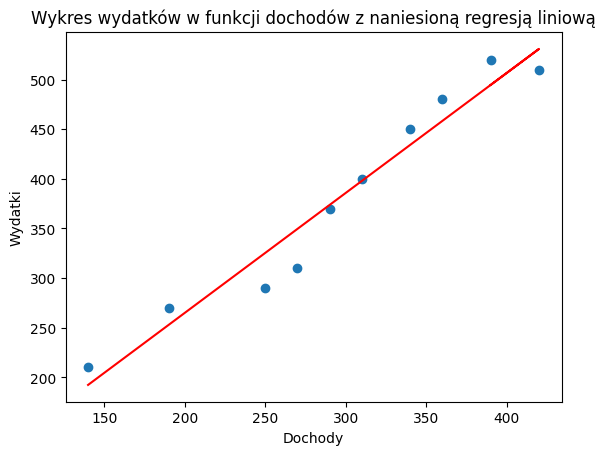

In [ ]:
w_avg = sum(w)/len(w)
d_avg = sum(d)/len(d)

licz_sum = 0
mian_sum = 0

for i in range(len(w)):
    licz_sum += d[i] * (w[i] - w_avg)
    mian_sum += (w[i] - w_avg) ** 2

a_simple = licz_sum / mian_sum
b_simple = d_avg - (a_simple * w_avg)

line_1 = (a_simple * w) + b_simple

print("Prosta regresja")
errors_1 = []
for i in range(len(d)):
    error = d[i]-line_1[i]
    errors_1.append(error)
    print("Dla dochodów na poziomie: {0}, blad przygotowanej regresji wyniosl: {1}".format(w[i], error))
norm_errors_1 = np.linalg.norm(errors_1)
print('\nDla przeprowadzonej "prostej regresji" uzyskalismy blad na poziomie: {0}'.format(norm_errors_1))

fig, ax = plt.subplots()
ax.plot(w, d, 'o')
ax.plot(w, line_1, 'r')
ax.set(title='Wykres wydatków w funkcji dochodów z naniesioną regresją liniową', xlabel='Dochody', ylabel='Wydatki')


Implementacja ta realizuje zadanie wyznaczenia prostej regresji liniowej, modelującej zależność wydatków (d) od dochodów (w). W pierwszym kroku obliczane są średnie wartości dla obu zmiennych, w_avg i d_avg. Następnie, kod ręcznie oblicza współczynniki regresji: nachylenie a oraz punkt przecięcia z osią Y b, stosując bezpośrednio wzory analityczne wynikające z metody najmniejszych kwadratów. W tym celu pętla for iteruje po wszystkich danych, akumulując sumy potrzebne do obliczenia licznika (kowariancji) i mianownika (wariancji w) dla wzoru na współczynnik a. Po wyznaczeniu a, współczynnik b jest obliczany na podstawie średnich. Na podstawie uzyskanych współczynników generowany jest wektor line_1, który reprezentuje przewidywane przez model wartości wydatków. W kolejnym kroku obliczany jest wektor błędów (residuów) jako różnica między rzeczywistymi wydatkami d a wartościami przewidywanymi line_1. Na końcu obliczana jest norma euklidesowa (L2) wektora błędów, która służy jako pojedyncza miara jakości dopasowania modelu. Ostatnim elementem jest wizualizacja wyników za pomocą Matplotlib, gdzie na wykres punktowy oryginalnych danych (w vs d) nałożona zostaje obliczona prosta regresji.

---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

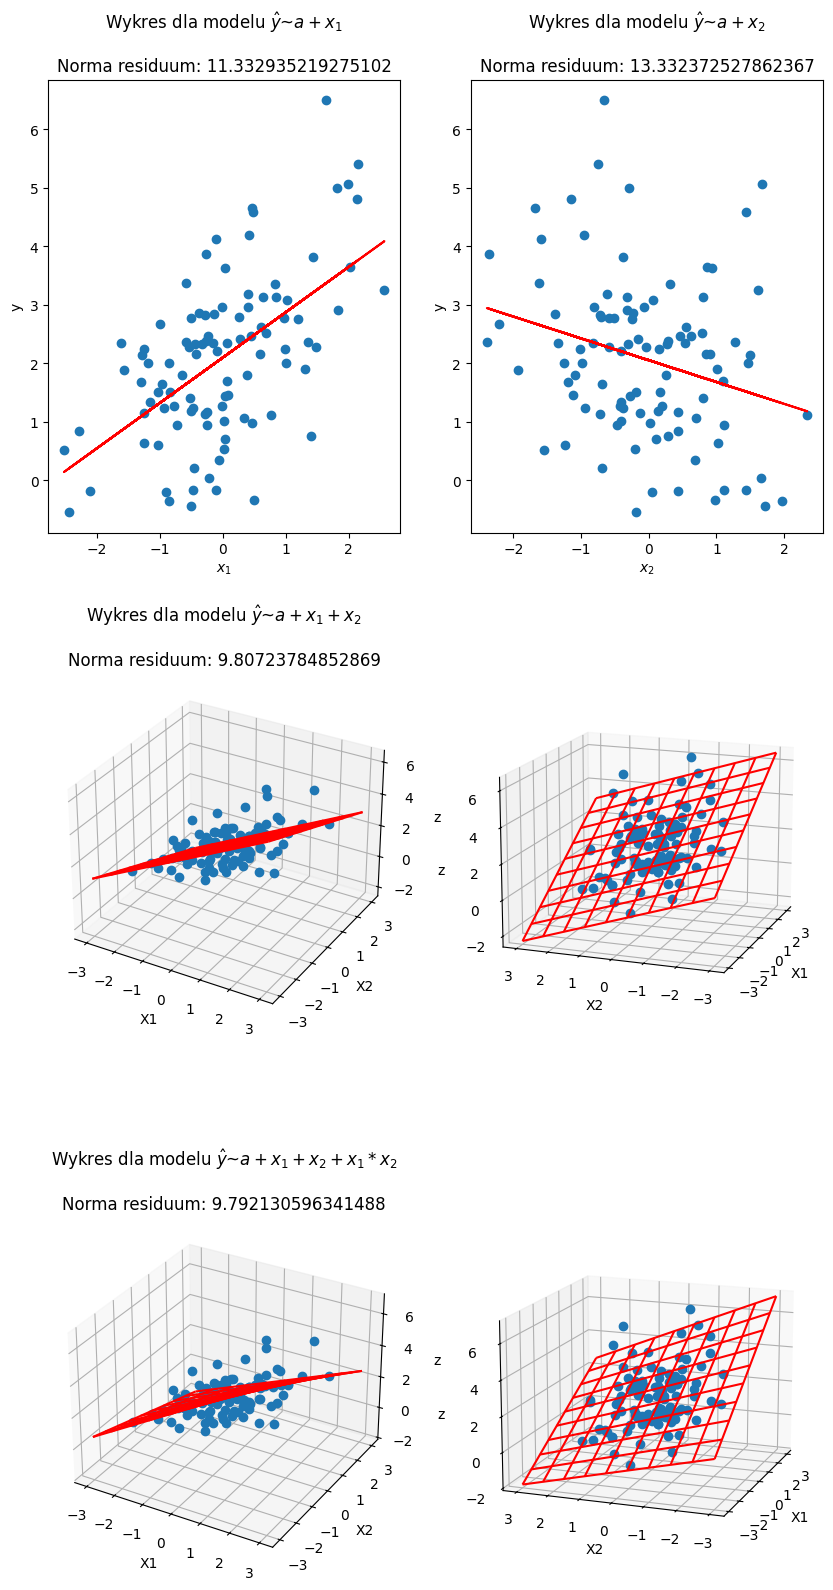

In [ ]:
mu, sigma = 0, 1 
x1 = np.random.normal(mu, sigma, size=(100,1))
x2 = np.random.normal(mu, sigma, size=(100,1))
E = np.random.normal(mu, sigma, size=(100,1))  

y = 2 + x1 - 0.5*x2 + E 

ones = np.ones([100, 1])
first = np.concatenate([ones, x1], 1)
second = np.concatenate([ones, x2], 1)
third = np.concatenate([ones, x1, x2], 1)
fourth = np.concatenate([ones, x1, x2, x1 * x2], 1)
fig = plt.figure(figsize=(10,20))
ax0 = fig.add_subplot(3, 2, 1)
ax1 = fig.add_subplot(3, 2, 2)
ax2 = fig.add_subplot(3, 2, 3, projection='3d')
ax3 = fig.add_subplot(3, 2, 4, projection='3d')
ax4 = fig.add_subplot(3, 2, 5, projection='3d')
ax5 = fig.add_subplot(3, 2, 6, projection='3d')

# (1) 
Q, R = np.linalg.qr(first)
y_q = Q.T @ y
11
a = sp.linalg.solve_triangular(R, y_q)
Y_first = a[0] + a[1] * x1
norm_first = main.residual_norm(first, a.flatten(), y.flatten())
ax0.plot(x1, y, 'o')
ax0.plot(x1, Y_first, 'r')
ax0.set(title=r'Wykres dla modelu $\hat{y}$~$a+x_1$' + '\n\nNorma residuum: {0}'.format(norm_first), xlabel='$x_1$', ylabel='y')

# (2)
Q, R = np.linalg.qr(second)
y_q = Q.T @ y
a = sp.linalg.solve_triangular(R, y_q)
Y_second = a[0] + a[1] * x2
norm_second = main.residual_norm(second, a.flatten(), y.flatten())
ax1.plot(x2, y, 'o')
ax1.plot(x2, Y_second, 'r')
ax1.set(title=r'Wykres dla modelu $\hat{y}$~$a+x_2$' + '\n\nNorma residuum: {0}'.format(norm_second), xlabel='$x_2$', ylabel='y')

# (3)
Q, R = np.linalg.qr(third)
y_q = Q.T @ y
a = sp.linalg.solve_triangular(R, y_q)
X_ax, Y_ax = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10))
Z_third = a[0] + a[1] * X_ax + a[2] * Y_ax
norm_third = main.residual_norm(third, a.flatten(), y.flatten())
ax2.plot(x1, x2, y, 'o')
ax2.plot_wireframe(X_ax, Y_ax, Z_third, color='r')
ax2.set(title=r'Wykres dla modelu $\hat{y}$~$a+x_1+x_2$' + '\n\nNorma residuum: {0}'.format(norm_third))
ax2.set(xlabel='X1', ylabel='X2', zlabel='z')
ax3.plot(x1, x2, y, 'o')
ax3.plot_wireframe(X_ax, Y_ax, Z_third, color='r')
ax3.view_init(15, 200, 0)
ax3.set(xlabel='X1', ylabel='X2', zlabel='z')

# (4)
Q, R = np.linalg.qr(fourth)
y_q = Q.T @ y
a = sp.linalg.solve_triangular(R, y_q)
X_ax, Y_ax = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10))
Z_fourth = a[0] + a[1] * X_ax + a[2] * Y_ax + a[3] * X_ax * Y_ax
norm_fourth = main.residual_norm(fourth, a.flatten(), y.flatten())
ax4.plot(x1, x2, y, 'o')
ax4.plot_wireframe(X_ax, Y_ax, Z_fourth, color='r')
ax4.set(title=r'Wykres dla modelu $\hat{y}$~$a+x_1+x_2+x_1*x_2$' + '\n\nNorma residuum: {0}'.format(norm_fourth))
ax4.set(xlabel='X1', ylabel='X2', zlabel='z')
ax5.plot(x1, x2, y, 'o')
ax5.plot_wireframe(X_ax, Y_ax, Z_fourth, color='r')
ax5.view_init(15, 200, 0)
ax5.set(xlabel='X1', ylabel='X2', zlabel='z')
plt.show()


Implementacja zadania rozpoczyna się od symulacji danych procesu zgodnie z Punktem 1. Za pomocą np.random.normal generowane są trzy wektory kolumnowe (100,1) o rozkładzie normalnym: x1, x2 oraz E (epsilon), reprezentujące odpowiednio zmienne niezależne i szum. Wektor wyjściowy y jest obliczany na podstawie prawdziwej zależności analitycznej y = 2 + x1 - 0.5x2 + E. W Punkcie 2, przechodząc do modelowania, tworzone są cztery macierze Z (nazwane first, second, third, fourth) odpowiadające czterem analizowanym modelom regresji. Każda macierz jest konstruowana przez konkatenację wektora jednostkowego (ones) z odpowiednimi zmiennymi niezależnymi (x1, x2 oraz ich iloczyn x1x2) przy użyciu np.concatenate. Dla każdego z czterech modeli, wektor współczynników regresji jest wyznaczany metodą rozkładu QR. Kod wykonuje rozkład QR na macierzy modelu (np. first) używając np.linalg.qr, transformuje wektor y przez pomnożenie przez Q.T, a następnie rozwiązuje powstały układ trójkątny (Rx = Q.T @ y) za pomocą sp.linalg.solve_triangular. Po uzyskaniu współczynników, dla każdego modelu obliczana jest norma residuów przy użyciu dostarczonej funkcji main.residual_norm, co służy jako metryka oceny dopasowania. Na koniec, implementacja tworzy wizualizacje: modele 2D są rysowane jako linie (ax0, ax1) na tle danych punktowych, natomiast modele 3D (third, fourth) są wizualizowane jako płaszczyzny (plot_wireframe) na tle chmury punktów danych (x1, x2, y). Do wygenerowania płaszczyzn regresji użyto np.meshgrid, a dla lepszej czytelności wykresy 3D są prezentowane z dwóch różnych kątów widzenia.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)